In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

plt.style.use("ggplot")
sns.set(font_scale=1.1)

In [3]:
with open(r"E:\Assignment\Zeru_assign\user-wallet-transactions.json\user-wallet-transactions.json", "r") as f:
    data = json.load(f)

df = pd.json_normalize(data)
df.head()

,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,__v,_id.$oid,...,actionData.repayerId,actionData.liquidatorId,actionData.collateralAmount,actionData.collateralAssetPriceUSD,actionData.principalAmount,actionData.borrowAssetPriceUSD,actionData.collateralReserveId,actionData.collateralReserveSymbol,actionData.principalReserveId,actionData.principalReserveSymbol
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,0,681d38fed63812d4655f571a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,0,681aa70dd6df53021cc6f3c0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,0,681d04c2d63812d4654c733e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,0,681d133bd63812d46551b6ef,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,0,681899e4ba49fc91cf2f4454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info() # Display basic information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   userWallet                          100000 non-null  object 
 1   network                             100000 non-null  object 
 2   protocol                            100000 non-null  object 
 3   txHash                              100000 non-null  object 
 4   logId                               100000 non-null  object 
 5   timestamp                           100000 non-null  int64  
 6   blockNumber                         100000 non-null  int64  
 7   action                              100000 non-null  object 
 8   __v                                 100000 non-null  int64  
 9   _id.$oid                            100000 non-null  object 
 10  actionData.type                     100000 non-null  object 
 11  actionData.amount          

In [5]:
df.isnull().sum() # Check for missing values

userWallet                                 0
network                                    0
protocol                                   0
txHash                                     0
logId                                      0
timestamp                                  0
blockNumber                                0
action                                     0
__v                                        0
_id.$oid                                   0
actionData.type                            0
actionData.amount                          0
actionData.assetSymbol                     0
actionData.assetPriceUSD                   0
actionData.poolId                          0
actionData.userId                          0
createdAt.$date                            0
updatedAt.$date                            0
actionData.toId                        67695
actionData.borrowRateMode             100000
actionData.borrowRate                  82914
actionData.variableTokenDebt           82914
actionData

1. `Missing Values Analysis`
Most columns have no missing values (e.g., userWallet, network, protocol, txHash, etc.).
Some columns have many missing values (e.g., actionData.toId, actionData.borrowRateMode, actionData.liquidatorId, etc.), indicating these features are only relevant for certain transaction types or actions.
Columns with a high number of missing values may need to be dropped, imputed, or handled carefully in further analysis or modeling.

In [6]:
# Preprocess and Feature Engineering
def normalize_usd(row):
    try:
        return float(row["actionData.amount"]) * float(row["actionData.assetPriceUSD"])
    except:
        return 0.0

df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
df["usd_value"] = df.apply(normalize_usd, axis=1)
df["action"] = df["action"].str.lower()
df["wallet"] = df["userWallet"]

df = df[["wallet", "timestamp", "action", "usd_value", "txHash"]]
df.head()

,wallet,timestamp,action,usd_value,txHash
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,2021-08-17 05:29:26,deposit,1.987664e+09,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...
1,0x000000000051d07a4fb3bd10121a343d85818da6,2021-05-20 15:36:53,deposit,2.856945e+20,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-24 09:28:33,deposit,9.223773e+14,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...
3,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-31 23:15:18,deposit,4.229933e+15,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...
4,0x0000000000e189dd664b9ab08a33c4839953852c,2021-04-19 15:25:07,redeemunderlying,5.026161e+05,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...


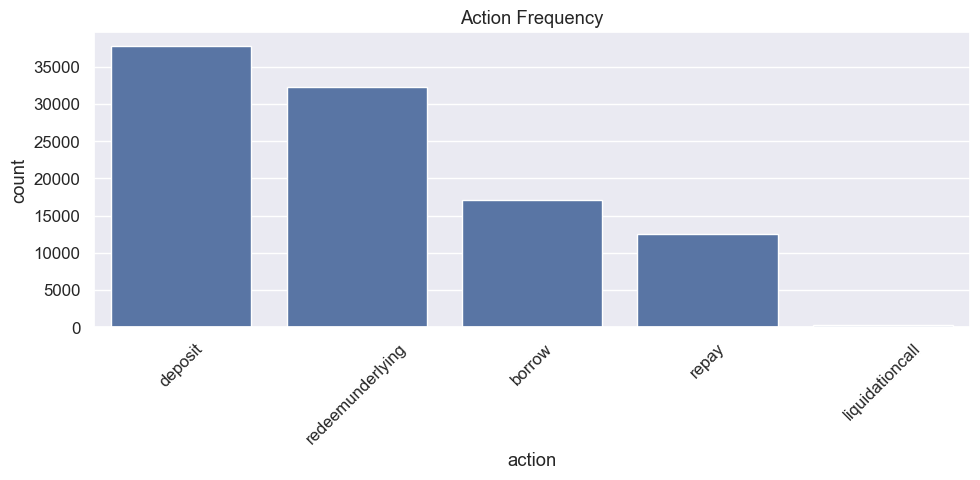

In [7]:
# Action Distribution Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="action", order=df["action"].value_counts().index)
plt.title("Action Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

`Action Distribution`
The action frequency plot shows which transaction types are most common in your dataset.
This helps identify the dominant user behaviors or protocol actions.

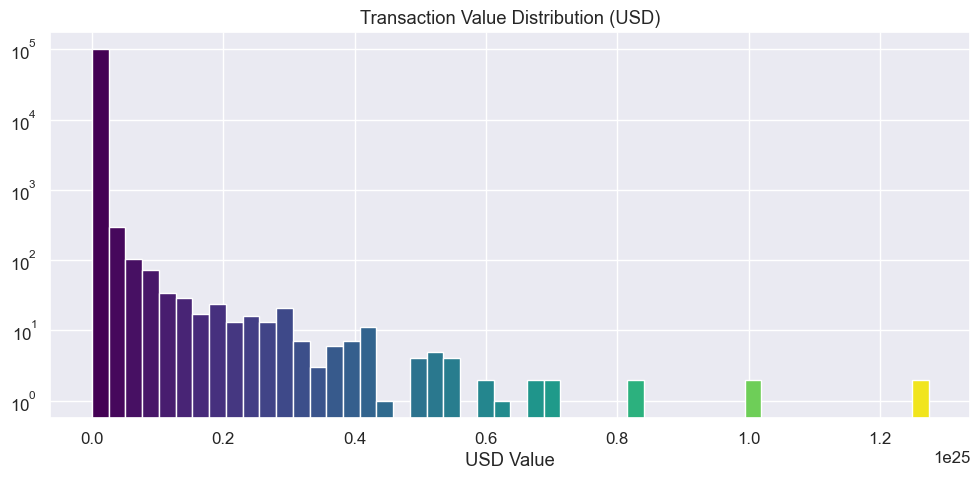

In [10]:

# Colorful histogram using matplotlib
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df["usd_value"], bins=50, log=True, color='grey')
cmap = plt.get_cmap('viridis')
for i, patch in enumerate(patches):
    plt.setp(patch, 'facecolor', cmap(i / len(patches)))
plt.title("Transaction Value Distribution (USD)")
plt.xlabel("USD Value")
plt.tight_layout()
plt.show()

`Transaction Value Distribution`
The USD value histogram (log scale, colorful) reveals the distribution of transaction sizes.
Most transactions are of small value, with a long tail of larger transactions.
Outliers or extremely large transactions are easily visible.

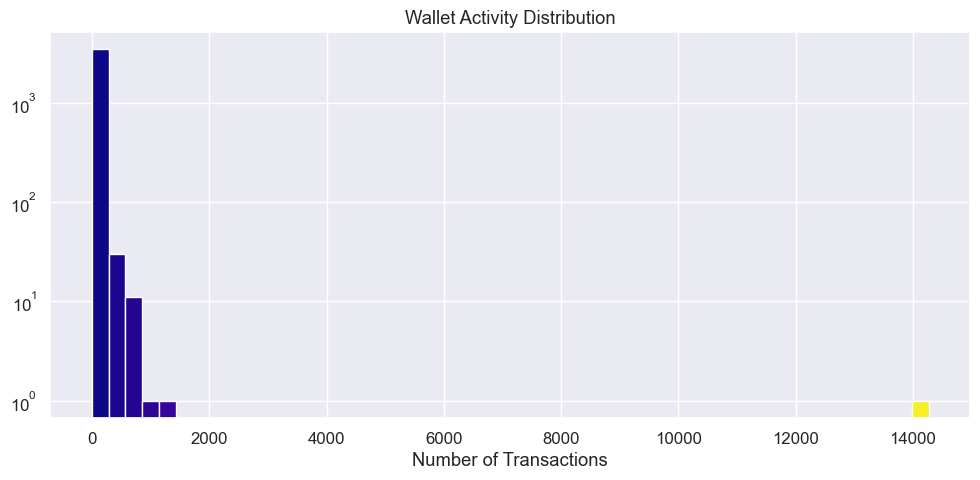

In [14]:
# Wallet Activity Distribution
wallet_tx = df.groupby("wallet")["txHash"].count()

plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(wallet_tx, bins=50, log=True, color='grey')
cmap = plt.get_cmap('plasma')
for i, patch in enumerate(patches):
    plt.setp(patch, 'facecolor', cmap(i / len(patches)))
plt.title("Wallet Activity Distribution")
plt.xlabel("Number of Transactions")
plt.tight_layout()
plt.show()

`Wallet Activity Distribution`
The wallet activity histogram (log scale, colorful) shows how many transactions each wallet has performed.
Most wallets are low-activity (few transactions), while a small number of wallets are highly active.
This highlights user engagement and possible power users or bots.

In [13]:
# Wallet Summary Stats
wallet_stats = df.groupby("wallet").agg(
    tx_count=("txHash", "count"),
    total_usd=("usd_value", "sum"),
    unique_actions=("action", "nunique"),
    first_tx=("timestamp", "min"),
    last_tx=("timestamp", "max")
)
wallet_stats["days_active"] = (wallet_stats["last_tx"] - wallet_stats["first_tx"]).dt.days + 1
wallet_stats.reset_index().head(10)

,wallet,tx_count,total_usd,unique_actions,first_tx,last_tx,days_active
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,1.987664e+09,1,2021-08-17 05:29:26,2021-08-17 05:29:26,1
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,2.856945e+20,1,2021-05-20 15:36:53,2021-05-20 15:36:53,1
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,5.152311e+15,1,2021-07-24 09:28:33,2021-07-31 23:15:18,8
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,9.803600e+20,1,2021-04-19 15:23:17,2021-08-26 23:15:16,130
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,3.797495e+23,4,2021-04-21 21:28:30,2021-09-01 18:15:24,133
5,0x000000000a38444e0a6e37d3b630d7e855a7cb13,25,2.300808e+22,4,2021-06-12 13:49:37,2021-07-21 20:33:04,40
6,0x000000003853fcedcd0355fec98ca3192833f00b,8,7.637632e+16,1,2021-08-01 06:01:49,2021-08-09 03:22:16,8
7,0x000000003ce0cf2c037493b1dc087204bd7f713e,492,8.908807e+23,4,2021-05-01 14:49:39,2021-09-02 02:51:49,124
8,0x000000007858e6f2668e1e06111cfa24403a5466,1,1.421607e+17,1,2021-06-06 00:47:39,2021-06-06 00:47:39,1
9,0x00000001a0f57e850c9db68b4a9bc34677437c5c,1,1.766653e+06,1,2021-07-23 03:41:21,2021-07-23 03:41:21,1
